<h1 style="text-align: center;">Trabalho Prático 1</h1>

<h3 style="text-align: center;">Aluno 1: Turi Andrade (2020007074)</h3>
<h3 style="text-align: center;">Aluno 2: Lourenço Monteiro (202000????)</h3>

#### Impedindo notebook de criar diretório _\_\_pycache\_\__

In [1]:
import sys
sys.dont_write_bytecode = True

#### Importando módulos

In [2]:
from modules.point import Point
from modules.convexHull import ConvexHull2D
from modules.KDTree import KDTree
from modules.line import Line2D
from modules.segment import Segment
from modules.intersectionChecker import IntersectionChecker

#### Importando bibliotecas externas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pontos linearmente separáveis

#### Gerando classes de pontos

In [4]:
lsPoints1 = []
for i in range(100):
    x = np.random.randint(-100, 0)
    y = np.random.randint(-100, 0)
    
    lsPoints1.append(Point(np.array([x, y])))

lsPoints2 = []
for i in range(100):
    x = np.random.randint(0, 100)
    y = np.random.randint(0, 100)
    
    lsPoints2.append(Point(np.array([x, y])))

#### Construindo envoltórias

In [5]:
lsCh1 = ConvexHull2D(lsPoints1, 0, 1)
lsHull1 = lsCh1.getHull()

lsCh2 = ConvexHull2D(lsPoints2, 0, 1)
lsHull2 = lsCh2.getHull()

#### Encontrando vértices mais próximos entre as duas envoltórias

In [6]:
[(lsHull1p, lsHull2p), lsHullsDist] = KDTree.closestPointsSubsets(lsHull1, lsHull2)

#### Computando linha que conecta os pontos mais próximos entre as envoltórias

In [7]:
lsLine = Line2D(0, 1, point1=lsHull1p, point2=lsHull2p)

#### Computando linha perpendicular que passa pela mediana dos pontos mais próximos entre as envoltórias

In [8]:
pLsLine = lsLine.perpendicularLine()

#### Testando separabilidade linear dos pontos de acordo com a linha perpendicular gerada

In [9]:
pLsLine.areLinearlySeparable(lsPoints1, lsPoints2)

True

#### Plotando envoltórias e linha de separação

In [10]:
isVertical, verticalCross = pLsLine.isVertical()

if(isVertical):
    plp1 = Point(np.array([verticalCross, -100]))
    plp2 = Point(np.array([verticalCross, 100]))
else:
    y1 = pLsLine.equation(-100)
    y2 = pLsLine.equation(100)
    plp1 = Point(np.array([-100, y1]))
    plp2 = Point(np.array([100, y2]))

(-110.0, 110.0, -108.9, 111.1)

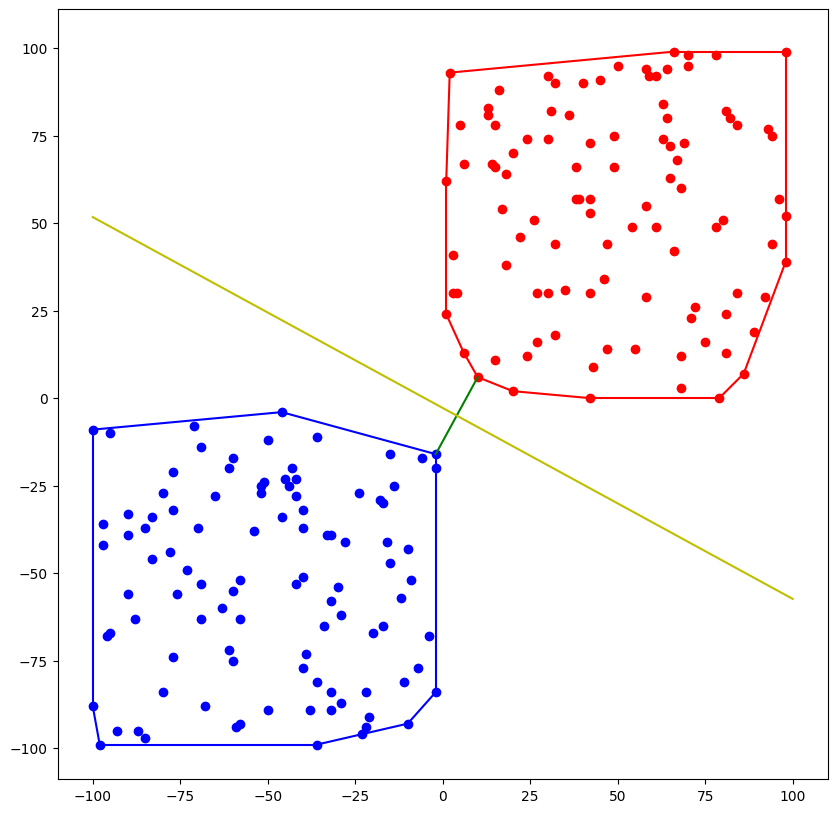

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

for point in lsPoints1:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="b")

for point in lsPoints2:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="r")
    

for i in range(len(lsHull1) - 1):
    ax.plot([lsHull1[i].getCoordinate(0), lsHull1[i+1].getCoordinate(0)], [lsHull1[i].getCoordinate(1), lsHull1[i+1].getCoordinate(1)], color='b')

ax.plot([lsHull1[len(lsHull1) - 1].getCoordinate(0), lsHull1[0].getCoordinate(0)], [lsHull1[len(lsHull1) - 1].getCoordinate(1), lsHull1[0].getCoordinate(1)], color="b")

for i in range(len(lsHull2) - 1):
    ax.plot([lsHull2[i].getCoordinate(0), lsHull2[i+1].getCoordinate(0)], [lsHull2[i].getCoordinate(1), lsHull2[i+1].getCoordinate(1)], color='r')

ax.plot([lsHull2[len(lsHull2) - 1].getCoordinate(0), lsHull2[0].getCoordinate(0)], [lsHull2[len(lsHull2) - 1].getCoordinate(1), lsHull2[0].getCoordinate(1)], color="r")


ax.plot([lsHull1p.getCoordinate(0), lsHull2p.getCoordinate(0)], [lsHull1p.getCoordinate(1), lsHull2p.getCoordinate(1)], color="g")
ax.plot([plp1.getCoordinate(0), plp2.getCoordinate(0)], [plp1.getCoordinate(1), plp2.getCoordinate(1)], color="y")

ax.axis('square')

## Pontos não linearmente separáveis

#### Gerando classes de pontos

In [12]:
nlsPoints1 = []
for i in range(100):
    x = np.random.randint(-100, 25)
    y = np.random.randint(-100, 25)
    
    nlsPoints1.append(Point(np.array([x, y])))

nlsPoints2 = []
for i in range(100):
    x = np.random.randint(-25, 100)
    y = np.random.randint(-25, 100)
    
    nlsPoints2.append(Point(np.array([x, y])))

#### Construindo envoltórias

In [13]:
nlsCh1 = ConvexHull2D(nlsPoints1, 0, 1)
nlsHull1 = nlsCh1.getHull()

nlsCh2 = ConvexHull2D(nlsPoints2, 0, 1)
nlsHull2 = nlsCh2.getHull()

#### Encontrando vértices mais próximos entre as duas envoltórias

In [14]:
[(nlsHull1p, nlsHull2p), nlsHullsDist] = KDTree.closestPointsSubsets(nlsHull1, nlsHull2)

#### Computando linha que conecta os pontos mais próximos entre as envoltórias

In [15]:
nlsLine = Line2D(0, 1, point1=nlsHull1p, point2=nlsHull2p)

#### Computando linha perpendicular que passa pela mediana dos pontos mais próximos entre as envoltórias

In [16]:
pNlsLine = nlsLine.perpendicularLine()

#### Testando separabilidade linear dos pontos de acordo com a linha perpendicular gerada

In [17]:
pLsLine.areLinearlySeparable(nlsPoints1, nlsPoints2)

False

#### Plotando envoltórias e linha de separação

In [18]:
isVertical, verticalCross = pNlsLine.isVertical()

if(isVertical):
    plp1 = Point(np.array([verticalCross, -100]))
    plp2 = Point(np.array([verticalCross, 100]))
else:
    y1 = pNlsLine.equation(-100)
    y2 = pNlsLine.equation(100)
    plp1 = Point(np.array([-100, y1]))
    plp2 = Point(np.array([100, y2]))

(-110.0, 110.0, -109.95, 110.05)

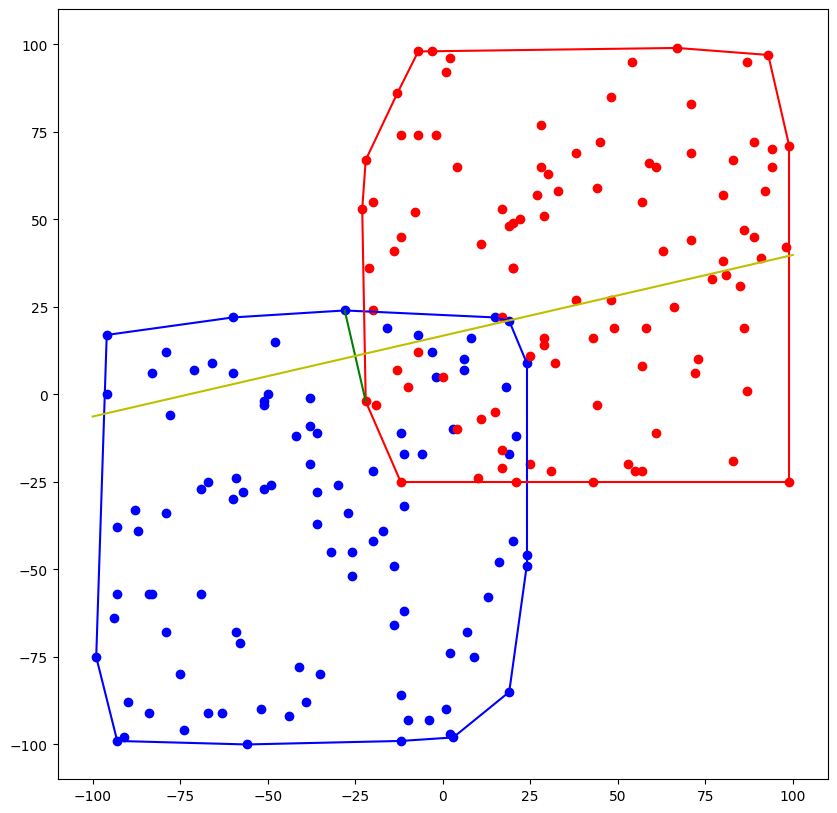

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

for point in nlsPoints1:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="b")

for point in nlsPoints2:
    ax.plot([point.getCoordinate(0)], [point.getCoordinate(1)], marker="o", color="r")
    

for i in range(len(nlsHull1) - 1):
    ax.plot([nlsHull1[i].getCoordinate(0), nlsHull1[i+1].getCoordinate(0)], [nlsHull1[i].getCoordinate(1), nlsHull1[i+1].getCoordinate(1)], color='b')

ax.plot([nlsHull1[len(nlsHull1) - 1].getCoordinate(0), nlsHull1[0].getCoordinate(0)], [nlsHull1[len(nlsHull1) - 1].getCoordinate(1), nlsHull1[0].getCoordinate(1)], color="b")

for i in range(len(nlsHull2) - 1):
    ax.plot([nlsHull2[i].getCoordinate(0), nlsHull2[i+1].getCoordinate(0)], [nlsHull2[i].getCoordinate(1), nlsHull2[i+1].getCoordinate(1)], color='r')

ax.plot([nlsHull2[len(nlsHull2) - 1].getCoordinate(0), nlsHull2[0].getCoordinate(0)], [nlsHull2[len(nlsHull2) - 1].getCoordinate(1), nlsHull2[0].getCoordinate(1)], color="r")


ax.plot([nlsHull1p.getCoordinate(0), nlsHull2p.getCoordinate(0)], [nlsHull1p.getCoordinate(1), nlsHull2p.getCoordinate(1)], color="g")
ax.plot([plp1.getCoordinate(0), plp2.getCoordinate(0)], [plp1.getCoordinate(1), plp2.getCoordinate(1)], color="y")

ax.axis('square')

## Teste de interseção em conjunto de segmentos

#### Gerando segmentos

In [25]:
segments = []

for i in range(4):
    p1 = Point(np.random.randint(0, 1000, size=2))
    p2 = Point(np.random.randint(0, 1000, size=2))

    segments.append(Segment(p1, p2))

#### Executando verificação

In [26]:
intersectionChecker = IntersectionChecker(segments, coordinate1=0, coordinate2=1)

intersectionChecker.run()

False

#### Averiguando resultado visualmente

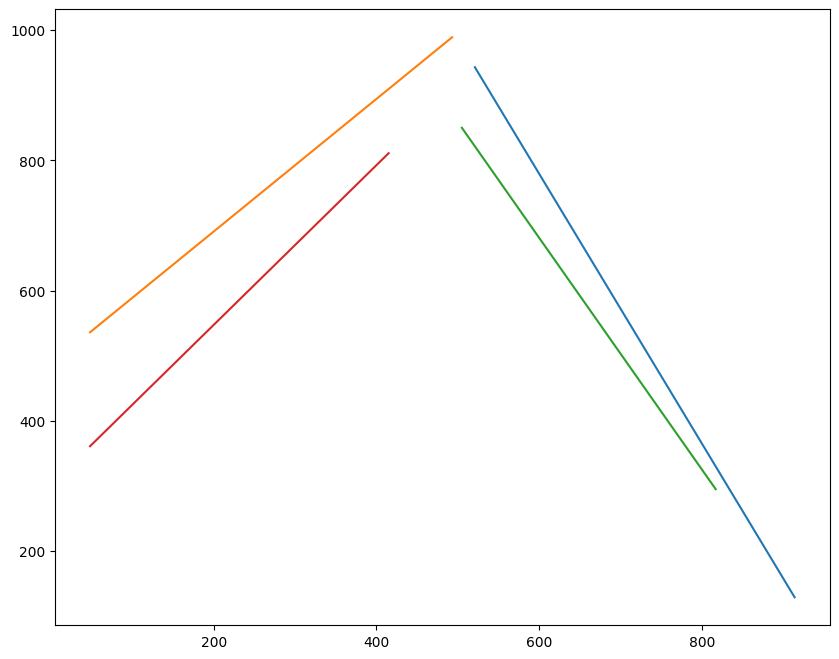

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for segment in segments:
    ax.plot([segment.getPointCoordinate(0, 0), segment.getPointCoordinate(1, 0)], [segment.getPointCoordinate(0, 1), segment.getPointCoordinate(1, 1)])